In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_diabetes = pd.read_csv('~/diabetes_binary.csv')

In [80]:
df_babies = pd.read_csv('~/babies.csv')
df_babies.drop('Unnamed: 0', axis = 1, inplace = True)

In [81]:
df_babies = df_babies.dropna() 

In [82]:
X = df_babies.drop('bwt', axis = 1)
y = df_babies['bwt']

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25) 

In [84]:
from sklearn.tree import DecisionTreeRegressor # Now we use the package scikit-learn and import tree module

reg_model = DecisionTreeRegressor(max_depth = 3).fit(train_X, train_y) # note the order you give it the sets is reversed. This is package-specific stuff

Decision Trees are a non-parametric supervised learning models used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. They work by progressively dividing the input space in subgroups according to a splitting rule that maximizes purity (homogeneity) of the Y values within each obtained group.

In [85]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


features = X.columns
classes = 'bwt'

# code to plot the tree
plt.figure(figsize=(18, 12))
plot_tree(reg_model,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples


In [86]:
reg_predictions = reg_model.predict(test_X)

In [87]:
reg_predictions

array([3234.76377953, 3269.97777778, 3422.63473054, 3422.63473054,
       3269.97777778, 3418.11594203, 3638.77606178, 3638.77606178,
       3638.77606178, 2952.90196078, 3422.63473054, 3422.63473054,
       3638.77606178, 3422.63473054, 3638.77606178, 3638.77606178,
       3234.76377953, 3638.77606178, 2952.90196078, 3422.63473054,
       3234.76377953, 3234.76377953, 3638.77606178, 3638.77606178,
       3638.77606178, 3418.11594203, 2952.90196078, 3422.63473054,
       3269.97777778, 3418.11594203, 3638.77606178, 2699.28571429,
       3638.77606178, 3638.77606178, 3418.11594203, 3638.77606178,
       3638.77606178, 3234.76377953, 3422.63473054, 3638.77606178,
       3638.77606178, 3269.97777778, 2952.90196078, 3269.97777778,
       3418.11594203, 3234.76377953, 3234.76377953, 3638.77606178,
       3638.77606178, 3422.63473054, 3638.77606178, 3418.11594203,
       2952.90196078, 2952.90196078, 3638.77606178, 3418.11594203,
       3418.11594203, 3269.97777778, 2699.28571429, 3234.76377

In [88]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(reg_predictions, test_y)  # with linear regression it was 305

368.50002033980417

In [ ]:
# Now classification

In [89]:
X = df.drop('Diabetes_binary', axis = 1)
y = df['Diabetes_binary']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20)

In [109]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(max_depth = 3).fit(train_X, train_y)

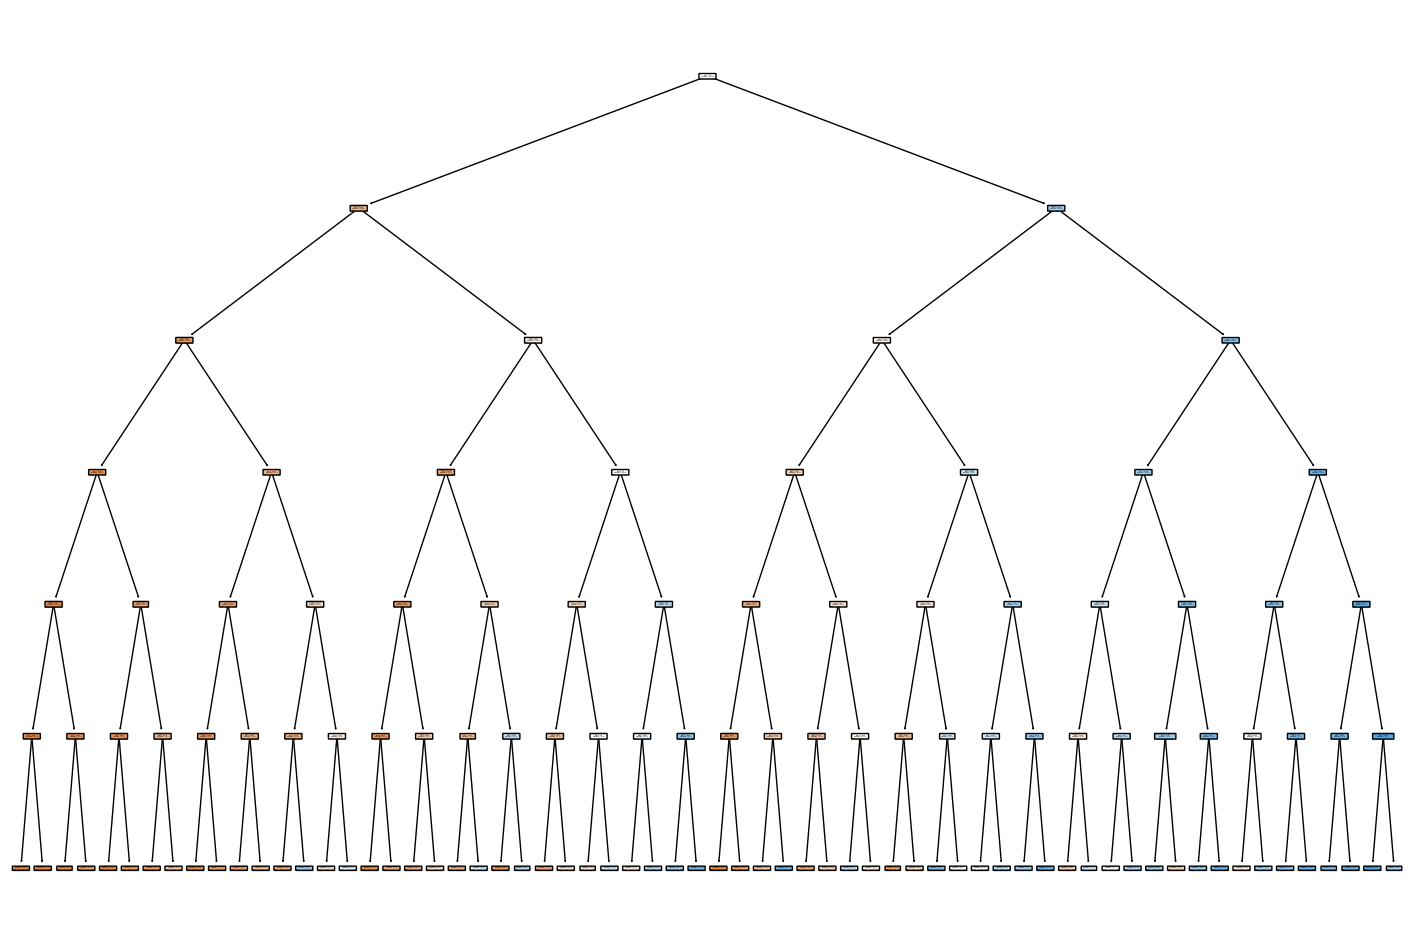

In [105]:
features = X.columns


# code to plot the tree
plt.figure(figsize=(18, 12))
plot_tree(clf_model,
          feature_names=features,
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples


In [110]:
clf_predictions = clf_model.predict_proba(test_X)[:,1]

In [111]:
clf_predictions

array([1., 1., 1., ..., 0., 0., 0.])

In [112]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, clf_predictions) # it was 0.8174 with logistic regression

0.6732127007637588

Trees too deep can easily overfit the training data, meaning they won't generalize well to new data. There are some techniques to ease the problem, like cost complexity pruning, where you remove splits that do not achieve a relevant increase in node purity. 
However, there are better techniques, based on the aggregation of many simpler learners (in this case, trees), which average the results to get to a final decision. These models, called ensemble models for obvious reason, are able to lower the variance thanks to the averaging of results, and are often very performing.
We will see the Random Forest model as an example. Another very good model is XGBoost

In [113]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 500, criterion = 'log_loss', max_depth = 10).fit(train_X, train_y)


In [114]:
rf_predictions = rf_model.predict_proba(test_X)[:,1] # I obtain predictions and select the second column, probability of diabetes

In [115]:
rf_predictions

array([0.67554719, 0.21525971, 0.73611807, ..., 0.15394655, 0.07863777,
       0.4350857 ])

In [116]:
roc_auc_score(test_y, rf_predictions)

0.8239602860320676

In [117]:
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This graph shows which variables generated, on average, the most relevant splits. It is built directly from the inner workings of the model, thus is model specific. We will see in the next lecture how Explainable AI models get to a similar output in a more robus, model-agnostic way.